In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [5]:
brain_data = pd.read_csv('brain_data.csv')

In [6]:
brain_data.head()

Head_Size  Brain_Weight
0       4512          1530
1       3738          1297
2       4261          1335
3       3777          1282
4       4177          1590

In [7]:
slope, intercept, r_value,_,_ = \
    stats.linregress(brain_data['Head_Size'], brain_data['Brain_Weight'])

In [8]:
#higher values are better, means more variance in the underlying data is captured by the straight line, however a very high value is suspect

print('R-square value', r_value**2)

R-square value 0.6393117199569996


In [9]:
slope

0.2634293394893994

In [10]:
intercept

325.57342104944235

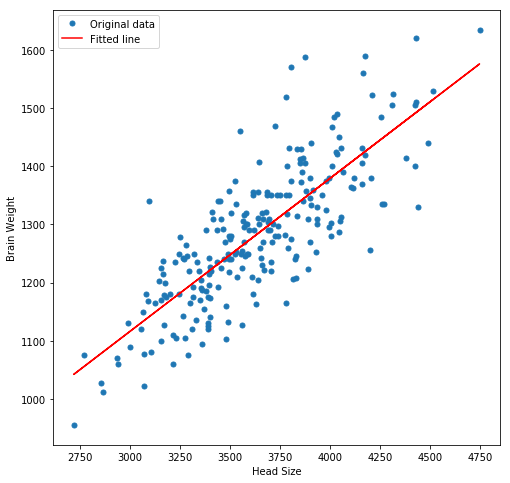

In [16]:
plt.figure(figsize=(8, 8))

plt.plot(brain_data['Head_Size'], brain_data['Brain_Weight'], 
         'o', label='Original data', markersize=5)

plt.plot(brain_data['Head_Size'], slope*brain_data['Head_Size'] + intercept, 
         'r', label='Fitted line')

plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

plt.legend()
plt.show()

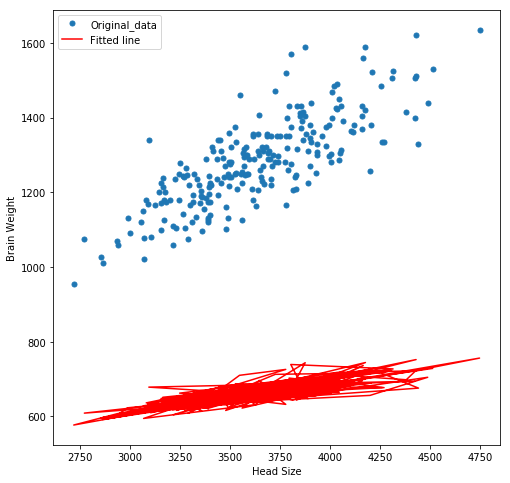

In [15]:
plt.figure(figsize=(8,8))

plt.plot(brain_data['Head_Size'], brain_data['Brain_Weight'],
            'o', label='Original_data',markersize=5)

plt.plot(brain_data['Head_Size'], slope*brain_data['Brain_Weight'] + intercept,
            'r', label='Fitted line',markersize=5)

plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

plt.legend()
plt.show()


In [17]:
!pip install -U sckit-learn

ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
admission_data = pd.read_csv('Admission_Predict.csv')

In [22]:
X = admission_data.drop('Chance of Admit ', axis=1)
Y = admission_data['Chance of Admit ']

In [23]:
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

In [24]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
x_train.shape, x_test.shape

((400, 7), (100, 7))

In [27]:
y_train.shape, y_test.shape

((400,), (100,))

In [29]:
x_train_with_intercept = sm.add_constant(x_train)

stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

In [31]:
fit_model.summary() # r and adjusted r square are large over 80% good model , 
#F-stat significant if it is a positive value and Prob F (or p value) stat should be under 5%  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     261.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          2.72e-143
Time:                        07:42:42   Log-Likelihood:                 565.65
No. Observations:                 400   AIC:                            -1115.
Df Residuals:                     392   BIC:                            -1083.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2104      0.114    -10.575      0.000      -1.435      -0.985
GRE Score             0.0016      0.001      2.903      0.004       0.001       0.003
TOEFL Score           0.0029      0.001      2.902      0.004       0.001       0.005
University Rating     0.0075      0.004      1.766      0.078      -0.001       0.016
SOP                   0.0008      0.005      0.159      0.873      -0.009       0.011
LOR                   0.0159      0.005      3.456      0.001       0.007       0.025
CGPA                  0.1188      0.011     10.971      0.000       0.098       0.140
Research              0.0222      0.007      3.091      0.002       0.008       0.036
==============================================================================
Omnibus:                       93.447   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.998
Skew:                          -1.195   Prob(JB):                     1.12e-45
Kurtosis:                       5.589   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)  #normalise makes it more robust, scaling all numeric data to be betwen 0 and 1 

In [34]:
y_pred_train = linear_model.predict(x_train)

In [35]:
from sklearn.metrics import r2_score

r2_score(y_pred_train, y_train)

0.7854742472067657

In [36]:
y_pred_test = linear_model.predict(x_test)

In [37]:
r2_score(y_pred_test, y_test)

0.7283321626732531